In [1]:
import os
import csv
import torch
import time
import numpy as np

import cv2
from PIL import Image

import matplotlib.pyplot as plt

In [41]:
class VideoRecord(object):
    def __init__(self, video_path, label):
        self.path = video_path
        self.video = cv2.VideoCapture(self.path)
        # Getting some properties after the first frame
        self.num_frames = self._get_num_frames()
        self.fps = self.video.get(cv2.CAP_PROP_FPS)
        self.label = label

    def _get_num_frames(self):
        count = 0
        success, frame = self.video.read()
        if not success:
            print('Failed to load video {}'.format(self.path))
            
        self.cv2_num_frames = self.video.get(cv2.CAP_PROP_FRAME_COUNT)
        while(success):
            success, frame = self.video.read()
            count += 1
        self.video.set(2, 0)

        return count

    def get_frames(self, indices):
        """
        Argument:
            indices : Sorted list of frames indices
        Returns:
            images : Dictionary in format {frame_id: PIL Image}
        """
        images = dict()
        self.video.set(cv2.CAP_PROP_POS_FRAMES, min(indices))
        for count in range(min(indices), max(indices)+1):
            success, frame = self.video.read()
            if success is False:
                print('\nCould not load frame {} from video {}\n'.format(count, self.path))
                return None

            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            if count in indices:
                images[count] = Image.fromarray(frame)

        return images


In [40]:
def parse_list(list_file):
        video_list = []
        with open(list_file) as f:
            reader = csv.DictReader(f)
            for row in reader:
                vid = row['id']
                actions = row['actions']
                length = row['length']
                if actions == '':
                    actions = []
                else:
                    actions = [a.split(' ') for a in actions.split(';')]
                    actions = [{'class': x, 'start': float(
                        y), 'end': float(z)} for x, y, z in actions]
                video_list.append([actions, vid, length])
                
        return video_list

train_file = '/media/v-pakova/Datasets/Charades/Annotations/Charades_v1_train.csv'
test_file = '/media/v-pakova/Datasets/Charades/Annotations/Charades_v1_test.csv'
root_path = '/media/v-pakova/Datasets/Charades/Charades_v1_480'
num_classes = 157
FPS = 24

train_list = parse_list(train_file)
test_list = parse_list(test_file)

In [48]:
def get_fps_dict(video_list):
    fps_dict = {}
    for i, (label, vid, length) in enumerate(video_list):
        if i%100 == 0:
            print(i)

        record = VideoRecord(os.path.join(root_path, vid+'.mp4'), label)
        if record.fps in fps_dict:
            fps_dict[record.fps] += 1
        else:
            fps_dict[record.fps] = 1
            
    return fps_dict
    

In [ ]:
train_fps = get_fps_dict(train_list)
test_fps = get_fps_dict(test_list)

0


In [113]:
def print_fps(fps_list, mode='training'):
    plt.figure(figsize=(20,10))
    x = range(len(fps_list[:,0]))
    plt.bar(x, fps_list[:,1])
    plt.xticks(x, fps_list[:,0])

    plt.axhline(max(fps_list[:,1]), linestyle='--', color='r')

    l, r = plt.xlim()
    plt.text(r+.5, max(fps_list[:,1]), int(max(fps_list[:,1])), va='center', ha="left")
    plt.text(r+.5, min(fps_list[:,1]), int(min(fps_list[:,1])), va='center', ha="left")

    plt.title('Quantity of videos per fps in {} data'.format(mode), fontsize=20)
    plt.tick_params(labelsize=14)

    plt.show()

    
def rounded_fps(fps_dict):
    rounded = {}
    for fps, count in fps_dict.items():
        fps = round(fps)
        if fps in rounded:
            rounded[fps] += count
        else:
            rounded[fps] = count
    return rounded

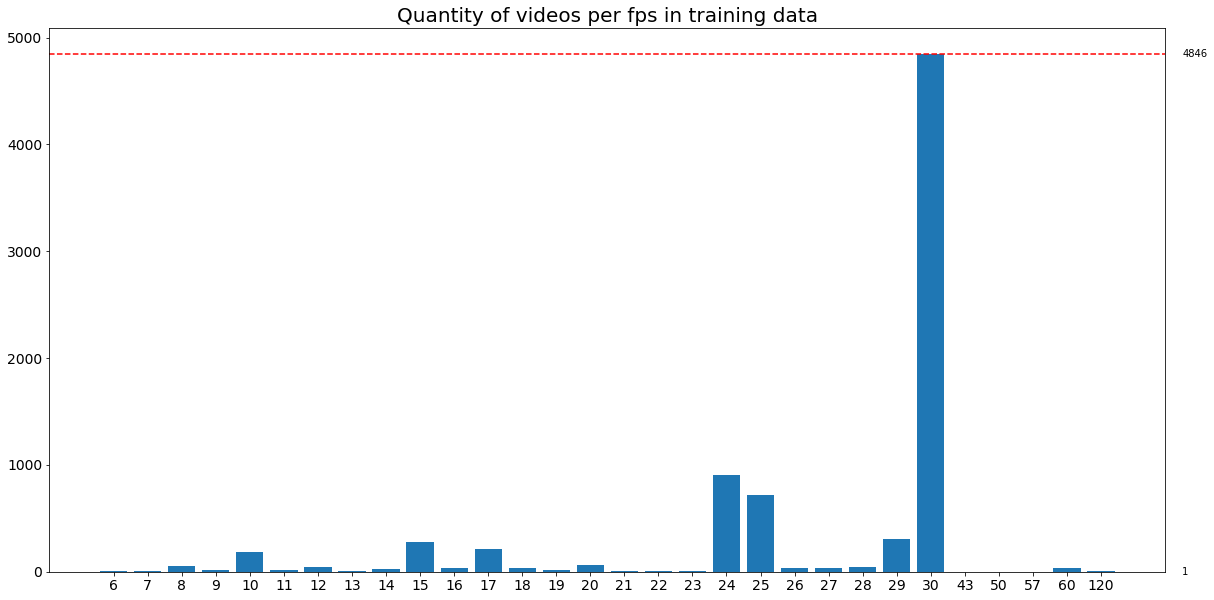

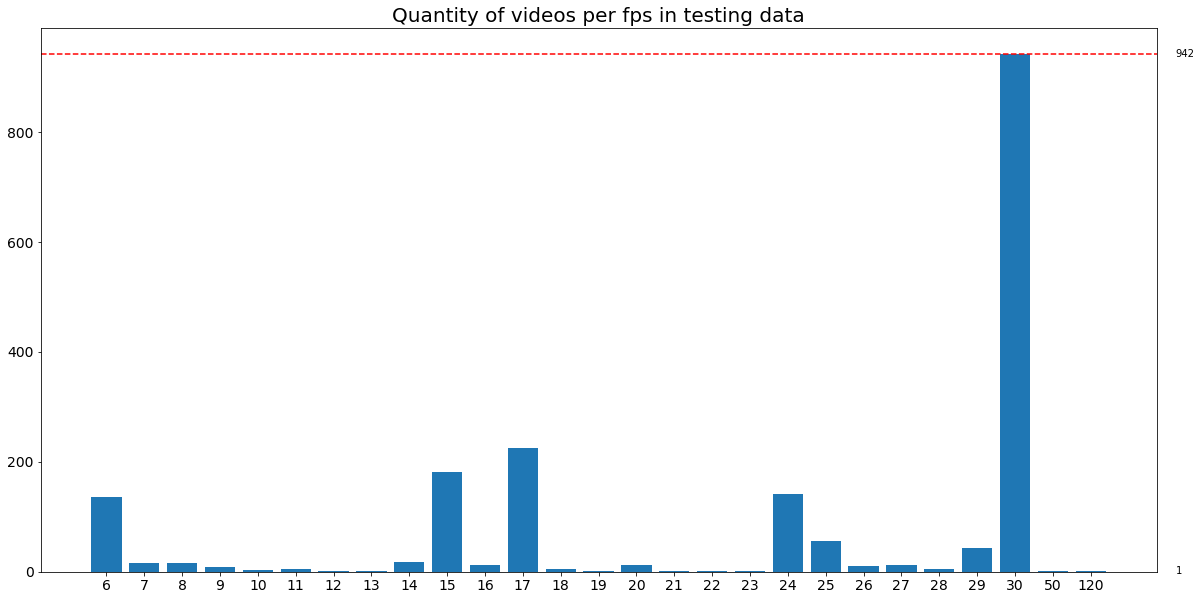

In [114]:
rounded_train = rounded_fps(train_fps)
rounded_test = rounded_fps(test_fps)

train_fps_list = np.array(sorted([[f[0], f[1]] for f in rounded_train.items()], key=lambda x: x[0]))
test_fps_list = np.array(sorted([[f[0], f[1]] for f in rounded_test.items()], key=lambda x: x[0]))

print_fps(train_fps_list, 'training')
print_fps(test_fps_list, 'testing')

In [82]:
train_fps_list[:,0]

array([ 24,  25,  29,  30,  20,  17,  10,  21,  15,  60,  18,  16,   9,
        27,  26,  11,  12, 120,  19,  14,  13,  28,   8,  23,  22,   7,
         6,  43,  50,  57])

In [ ]:
kinetics_file =  '/media/v-pakova/Datasets/Kinetics/400/Annotation/train_clips_256_list.txt'
kinetics_root_path =  '/media/v-pakova/Datasets/Kinetics/400/train_clips_256'

kinetics_list = [x.strip().split(' ') for x in open(kinetics_file)]

kinetics_fps_dict = {}
for i, (label, vid) in enumerate(kinetics_list):

    record = VideoRecord(os.path.join(kinetics_root_path, vid), label)
    if record.fps in kinetics_fps_dict:
            kinetics_fps_dict[record.fps] += 1
    else:
            kinetics_fps_dict[record.fps] = 1


Failed to load video /media/v-pakova/Datasets/Kinetics/400/train_clips_256/air_drumming/CUxsn4YXksI_000119_000129.mp4
Failed to load video /media/v-pakova/Datasets/Kinetics/400/train_clips_256/assembling_computer/xxUezLcXkDs_000256_000266.mp4


In [36]:
cv2.CAP_PROP_POS_AVI_RATIO 

2

In [123]:
np.linspace(0, 32, 32, dtype=int)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32])

In [8]:
video_path = '/data/Datasets/Charades/Charades_v1_480/U08M9.mp4'

t1 = time.time()

v = cv2.VideoCapture(video_path)
t2 = time.time()

v.set(cv2.CAP_PROP_POS_FRAMES, 100)
t3 = time.time()

v.set(2, 0)
t4 = time.time()

for i in range(100):
    success, frame = v.read()
t5 = time.time()

v.release()
t6 = time.time()

print('Open a video:     {}'.format(t2-t1))
print('Set a pos:        {}'.format(t3-t2))
print('Read until a pos: {}'.format(t4-t3))
print('Set begin:        {}'.format(t5-t4))
print('Release a video:  {}'.format(t6-t5))

Open a video:     0.002869129180908203
Set a pos:        0.018662691116333008
Read until a pos: 0.000576019287109375
Set begin:        0.029413461685180664
Release a video:  0.0007104873657226562


In [10]:
import sys
sys.path.insert(0, '..')
from datasets.video_record import VideoRecord

import os
import csv

In [6]:
train_file = '/data/Datasets/Charades/Annotations/Charades_v1_train.csv'
test_file = '/data/Datasets/Charades/Annotations/Charades_v1_test.csv'
root_path = '/data/Datasets/Charades/Charades_v1_480'

In [4]:
def _parse_list(list_file):
    video_list = []
    with open(list_file) as f:
        reader = csv.DictReader(f)
        for row in reader:
            vid = row['id'] + '.mp4'
            actions = row['actions']
            if actions == '':
                actions = []
            else:
                actions = [a.split(' ') for a in actions.split(';')]
                actions = [{
                    'class': x,
                    'start': float(y),
                    'end': float(z)
                } for x, y, z in actions]
            video_list.append([actions, vid])

    return video_list

In [7]:
train_list = _parse_list(train_file)
test_list = _parse_list(test_file)

In [11]:
def load_videos(video_list):
    for index, (label, video_path) in enumerate(video_list):
        try:
            record = VideoRecord(os.path.join(root_path, video_path), label)

        except ValueError as e:
            print(e)

In [12]:
print('Training videos....')
load_videos(train_list)
print('Testing videos....')
load_videos(test_list)

Training videos....
Testing videos....
